# **CSCI317 Lab8 RNN, LSTM and RBM**


## **Recurrent Neural Network**
for details on RNN works visit [this page](https://www.simplilearn.com/tutorials/deep-learning-tutorial/rnn)

### **Application1 : improving fasion object identification**

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.layers.serialization import activation

In [ ]:
#load data
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#load data
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.astype("float32") / 255.0, x_test.astype("float32") / 255.0

**RNN Model**

In [ ]:
model_rrn=keras.Sequential()
model_rrn.add(keras.Input(shape=(None,28)))
model_rrn.add(layers.SimpleRNN(512, return_sequences=True, activation='relu'))
model_rrn.add(layers.SimpleRNN(512, activation='relu'))
model_rrn.add(layers.Dense(10))
model_rrn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 512)         276992    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 512)               524800    
                                                                 
 dense (Dense)               (None, 10)                5130      
                                                                 
Total params: 806,922
Trainable params: 806,922
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_rrn.compile(optimizer = tf.optimizers.Adam(learning_rate=0.001),
              loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model_rrn.fit(x_train, y_train, batch_size=64, epochs=5, verbose=1)

Epoch 1/5
938/938 [==============================] - 307s 325ms/step - loss: 0.6641 - accuracy: 0.7622
Epoch 2/5
938/938 [==============================] - 318s 339ms/step - loss: 0.4453 - accuracy: 0.8408
Epoch 3/5
938/938 [==============================] - 305s 326ms/step - loss: 0.3971 - accuracy: 0.8560
Epoch 4/5
938/938 [==============================] - 304s 324ms/step - loss: 0.3592 - accuracy: 0.8698
Epoch 5/5
938/938 [==============================] - 301s 321ms/step - loss: 0.3685 - accuracy: 0.8683


In [ ]:
model_rrn.evaluate(x_test, y_test)

313/313 [==============================] - 19s 59ms/step - loss: 0.3722 - accuracy: 0.8644


[0.3721939027309418, 0.8644000291824341]

**LSTM Model**

In [ ]:
model_LSTM=keras.Sequential()
model_LSTM.add(keras.Input(shape=(None,28)))
model_LSTM.add(layers.LSTM(512, return_sequences=True, activation='tanh'))
model_LSTM.add(layers.LSTM(512, activation='tanh'))
model_LSTM.add(layers.Dense(10))
model_LSTM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 512)         1107968   
                                                                 
 lstm_1 (LSTM)               (None, 512)               2099200   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 3,212,298
Trainable params: 3,212,298
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_LSTM.compile(optimizer = tf.optimizers.Adam(learning_rate=0.001),
              loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model_LSTM.fit(x_train, y_train, batch_size=64, epochs=5, verbose=1)

Epoch 1/5
  5/938 [..............................] - ETA: 21:17 - loss: 1.9693 - accuracy: 0.2594

KeyboardInterrupt: ignored

In [ ]:
model_LSTM.evaluate(x_test, y_test)

**Bidirectional LSTM**


In [ ]:
model_LSTM_B=keras.Sequential()
model_LSTM_B.add(keras.Input(shape=(None,28)))
model_LSTM_B.add(
    layers.Bidirectional(
        layers.LSTM(256, return_sequences=True, activation='tanh')
    ))
model_LSTM_B.add(
    layers.Bidirectional(
        layers.LSTM(256,activation='tanh')
    ))
model_LSTM_B.add(layers.Dense(10))
model_LSTM_B.summary()

In [ ]:
model_LSTM_B.compile(optimizer = tf.optimizers.Adam(learning_rate=0.001),
              loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model_LSTM_B.fit(x_train, y_train, batch_size=64, epochs=5, verbose=1)

In [ ]:
model_LSTM_B.evaluate(x_test, y_test)

### **Application2: Generate Music!!**

In [ ]:
!pip install -Iv https://pypi.python.org/packages/source/p/pyFluidSynth/pyFluidSynth-1.2.4.tar.gz

Using pip 22.0.4 from /usr/local/lib/python3.9/dist-packages/pip (python 3.9)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-4cwzguyv/pyFluidSynth.egg-info
  writing /tmp/pip-pip-egg-info-4cwzguyv/pyFluidSynth.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-4cwzguyv/pyFluidSynth.egg-info/dependency_links.txt
  writing top-level names to /tmp/pip-pip-egg-info-4cwzguyv/pyFluidSynth.egg-info/top_level.txt
  writing manifest file '/tmp/pip-pip-egg-info-4cwzguyv/pyFluidSynth.egg-info/SOURCES.txt'
  reading manifest file '/tmp/pip-pip-egg-info-4cwzguyv/pyFluidSynth.egg-info/SOURCES.txt'
  writing manifest file '/tmp/pip-pip-egg-info-4cwzguyv/pyFluidSynth.egg-info/SOURCES.txt'
  Preparing metadata (setup.py) ... done
  Running command python setup.py bdist_wheel
  running bdist_wheel
  running build
  running build_py
  creati

In [ ]:
!pip install pyfluidsynth
!pip install --upgrade pyfluidsynth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: pyfluidsynth
    Found existing installation: pyFluidSynth 1.2.4
    Uninstalling pyFluidSynth-1.2.4:
      Successfully uninstalled pyFluidSynth-1.2.4


In [ ]:
!pip install pretty_midi
!pip install --upgrade pretty_midi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 24.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 5.4 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592303 sha256=e8b62552115603f714628317627450160a6c05a6889f10e3cd8ef2c460f077c6
  Stored in directory: /root/.cache/pip/wheels/75/ec/20/b8e937a5bcf1de547ea5ce465db7de7f6761e15e6f0a01e25f
Successfully built pretty_midi
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import collections
import datetime
import glob
import numpy as np
import pathlib
import pandas as pd
import pretty_midi
import seaborn as sns
import tensorflow as tf

from IPython import display
from matplotlib import pyplot as plt
from typing import Dict, List, Optional, Sequence, Tuple


In [ ]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# Sampling rate for audio playback
_SAMPLING_RATE = 16000


In [ ]:
#get the dataset
data_dir = pathlib.Path('data/maestro-v2.0.0')
if not data_dir.exists():
  tf.keras.utils.get_file(
      'maestro-v2.0.0-midi.zip',
      origin='https://storage.googleapis.com/magentadata/datasets/maestro/v2.0.0/maestro-v2.0.0-midi.zip',
      extract=True,
      cache_dir='.', cache_subdir='data',
  )

59243107/59243107 [==============================] - 1s 0us/step


In [ ]:
filenames = glob.glob(str(data_dir/'**/*.mid*')) #recursively accsing folders and files
print('Number of files:', len(filenames))
sample_file = filenames[1]
print(sample_file)

Number of files: 1282
data/maestro-v2.0.0/2018/MIDI-Unprocessed_Recital13-15_MID--AUDIO_14_R1_2018_wav--4.midi


In [ ]:
#generate pretty midi object and play sample file
pm = pretty_midi.PrettyMIDI(sample_file)

def display_audio(pm: pretty_midi.PrettyMIDI, seconds=50):  #num of seconds changed
  waveform = pm.synthesize(fs=_SAMPLING_RATE)
  # Take a sample of the generated waveform to mitigate kernel resets
  waveform_short = waveform[:seconds*_SAMPLING_RATE]
  return display.Audio(waveform_short, rate=_SAMPLING_RATE)

display_audio(pm)


In [ ]:
#find some details
print('Number of instruments:', len(pm.instruments))
instrument = pm.instruments[0]
instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
print('Instrument name:', instrument_name)


Number of instruments: 1
Instrument name: Acoustic Grand Piano


In [ ]:
#extract notes
def midi_to_notes(midi_file: str) -> pd.DataFrame:
  pm = pretty_midi.PrettyMIDI(midi_file)
  instrument = pm.instruments[0]
  notes = collections.defaultdict(list)

  # Sort the notes by start time
  sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
  prev_start = sorted_notes[0].start

  for note in sorted_notes:
    start = note.start
    end = note.end
    notes['pitch'].append(note.pitch)
    notes['start'].append(start)
    notes['end'].append(end)
    notes['step'].append(start - prev_start)
    notes['duration'].append(end - start)
    prev_start = start

  return pd.DataFrame({name: np.array(value) for name, value in notes.items()})

raw_notes = midi_to_notes(sample_file)
raw_notes.head()

get_note_names = np.vectorize(pretty_midi.note_number_to_name)
sample_note_names = get_note_names(raw_notes['pitch'])
sample_note_names[:10]


array(['D#2', 'A#2', 'D#3', 'F#3', 'A#3', 'F#5', 'F5', 'G#5', 'F5', 'F#5'],
      dtype='<U3')

In [ ]:
raw_notes = midi_to_notes(sample_file)
raw_notes.head()

pitch     start       end      step  duration
0     39  0.994792  1.408854  0.000000  0.414062
1     46  1.111979  1.368490  0.117187  0.256510
2     51  1.204427  1.471354  0.092448  0.266927
3     54  1.309896  1.471354  0.105469  0.161458
4     58  1.415365  1.480469  0.105469  0.065104

In [ ]:
#create tarining datase
num_files = 15 #num_files changed
all_notes = []
for f in filenames[:num_files]:
  notes = midi_to_notes(f)
  all_notes.append(notes)

all_notes = pd.concat(all_notes)
n_notes = len(all_notes)
print('Number of notes parsed:', n_notes)


Number of notes parsed: 150286


In [ ]:
#create notes array
key_order = ['pitch', 'step', 'duration']
train_notes = np.stack([all_notes[key] for key in key_order], axis=1)
train_notes

array([[5.70000000e+01, 0.00000000e+00, 4.45312500e-01],
       [5.30000000e+01, 3.90625000e-03, 6.13281250e-01],
       [4.50000000e+01, 5.20833333e-03, 3.94531250e-01],
       ...,
       [4.30000000e+01, 2.60416667e-03, 5.24739583e-01],
       [3.90000000e+01, 2.60416667e-03, 4.86979167e-01],
       [3.60000000e+01, 1.30208333e-03, 4.73958333e-01]])

In [ ]:
#create tf.data.Dataset from the notes
#check the dataset list of fucntions and example here: https://www.tensorflow.org/api_docs/python/tf/data/Dataset
notes_ds = tf.data.Dataset.from_tensor_slices(train_notes)
notes_ds.element_spec

TensorSpec(shape=(3,), dtype=tf.float64, name=None)

You will train the model on batches of sequences of notes. Each example will consist of a sequence of notes as the input features, and the next note as the label. In this way, the model will be trained to predict the next note in a sequence.

In [ ]:
def create_sequences(
    dataset: tf.data.Dataset,
    seq_length: int,
    vocab_size = 128,
) -> tf.data.Dataset:
  """Returns TF Dataset of sequence and label examples."""

  seq_length = seq_length+1

  # Take 1 extra for the labels
  #seq_length: number of notes in a window
  #shift: ????
  #stride: number of notes to slide over

  #creating a dataset of datasets
  windows = dataset.window(seq_length, shift=1, stride=1,
                              drop_remainder=True)

  # `flat_map` flattens the" dataset of datasets" into a dataset of tensors
  flatten = lambda x: x.batch(seq_length, drop_remainder=True)
  sequences = windows.flat_map(flatten)

  # Normalize note pitch
  #vocab_size 128 which is number of pitches  supported by pretty_midi
  def scale_pitch(x):
    x = x/[vocab_size,1.0,1.0]
    return x

  # Split the labels
  def split_labels(sequences):
    inputs = sequences[:-1] #features: everything except last note
    labels_dense = sequences[-1] #lable: last note
    labels = {key:labels_dense[i] for i,key in enumerate(key_order)}

    return scale_pitch(inputs), labels

  #tf.data.AUTOTUNE: perfromance tuning and allocating cpu
  return sequences.map(split_labels, num_parallel_calls=tf.data.AUTOTUNE)


In [ ]:
#Experiment with different lengths (e.g. 50, 100, 150) to see which one works best for the data
seq_length = 15 #feature size ==> note26th becomes the lable
vocab_size = 128 #is set to 128 representing all the pitches supported by pretty_midi
seq_ds = create_sequences(notes_ds, seq_length, vocab_size) #create the dataset
seq_ds.element_spec

(TensorSpec(shape=(15, 3), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(), dtype=tf.float64, name=None)})

In [ ]:
for seq, target in seq_ds.take(1):
  print('sequence shape:', seq.shape)
  print('sequence elements (first 10):', seq[0: 10])
  print()
  print('target:', target)


sequence shape: (15, 3)
sequence elements (first 10): tf.Tensor(
[[0.4453125  0.         0.4453125 ]
 [0.4140625  0.00390625 0.61328125]
 [0.3515625  0.00520833 0.39453125]
 [0.390625   0.00911458 0.40885417]
 [0.296875   0.37239583 0.25      ]
 [0.5078125  0.00390625 0.31510417]
 [0.484375   0.05208333 0.22395833]
 [0.4453125  0.19140625 0.17447917]
 [0.4140625  0.0078125  0.265625  ]
 [0.390625   0.00260417 0.19661458]], shape=(10, 3), dtype=float64)

target: {'pitch': <tf.Tensor: shape=(), dtype=float64, numpy=45.0>, 'step': <tf.Tensor: shape=(), dtype=float64, numpy=0.01171875>, 'duration': <tf.Tensor: shape=(), dtype=float64, numpy=0.13411458333333304>}


In [ ]:
#configure the dataset for perfromance
batch_size = 64
buffer_size = n_notes - seq_length  # the number of items in the dataset minus window size
train_ds = (seq_ds
            .shuffle(buffer_size)
            .batch(batch_size, drop_remainder=True)
            .cache()
            .prefetch(tf.data.experimental.AUTOTUNE))
train_ds.element_spec

(TensorSpec(shape=(64, 15, 3), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(64,), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(64,), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(64,), dtype=tf.float64, name=None)})

In [ ]:
#loss function
def mse_with_positive_pressure(y_true: tf.Tensor, y_pred: tf.Tensor):
  mse = (y_true - y_pred) ** 2 #mean square error
  positive_pressure = 10 * tf.maximum(-y_pred, 0.0)
  return tf.reduce_mean(mse + positive_pressure)


In [ ]:
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Dropout

#create a model
input_shape = (seq_length, 3)
learning_rate = 0.002

inputs = tf.keras.Input(input_shape)
#Setting LSTM Layer
#https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM
x = tf.keras.layers.LSTM(256)(inputs)
# Add a Bidirectional LSTM layer with 128 hidden units
x = Bidirectional(LSTM(128))(inputs)
# Add a Dropout layer with a 0.5 dropout rate
x = Dropout(0.5)(x)

#having multiple value for output layer
outputs = {
  'pitch': tf.keras.layers.Dense(128, name='pitch')(x),
  'step': tf.keras.layers.Dense(1, name='step')(x),
  'duration': tf.keras.layers.Dense(1, name='duration')(x),
}

#https://www.tensorflow.org/guide/keras/functional
#https://www.tensorflow.org/api_docs/python/tf/keras/Model
model_music = tf.keras.Model(inputs, outputs) #this is not squencial anymore, it's functional model

loss = {
      'pitch': tf.keras.losses.SparseCategoricalCrossentropy(
          from_logits=True),
      'step': mse_with_positive_pressure,
      'duration': mse_with_positive_pressure,
}

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model_music.compile(loss=loss, optimizer=optimizer)

model_music.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 15, 3)]      0           []                               
                                                                                                  
 bidirectional_1 (Bidirectional  (None, 256)         135168      ['input_6[0][0]']                
 )                                                                                                
                                                                                                  
 dropout_1 (Dropout)            (None, 256)          0           ['bidirectional_1[0][0]']        
                                                                                                  
 duration (Dense)               (None, 1)            257         ['dropout_1[0][0]']        

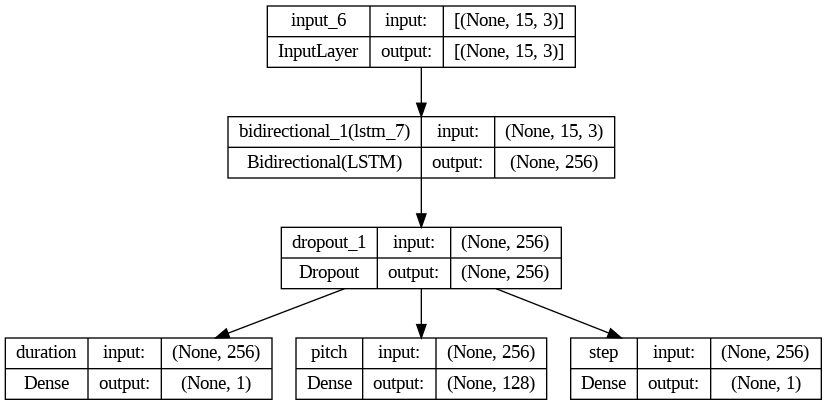

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model_music, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
losses = model_music.evaluate(train_ds, return_dict=True)
losses

2347/2347 [==============================] - 83s 25ms/step - loss: 5.5101 - duration_loss: 0.2005 - pitch_loss: 4.8509 - step_loss: 0.4588


{'loss': 5.510097503662109,
 'duration_loss': 0.20045526325702667,
 'pitch_loss': 4.850892066955566,
 'step_loss': 0.4587569236755371}

In [ ]:
import time
#train the model
callbacks = [
    #saving model weight fro epoch
    tf.keras.callbacks.ModelCheckpoint(
        filepath='./training_checkpoints/ckpt_{epoch}',
        save_weights_only=True),

    tf.keras.callbacks.EarlyStopping(
        monitor='accuracy',
        patience=3, #number of epochs with no improvements
        verbose=1, #display msg --> 0 for not displaying message
        restore_best_weights=True),
]


epochs = 5

history = model_music.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
)


Epoch 1/5
   2347/Unknown - 159s 66ms/step - loss: 4.1610 - duration_loss: 0.1206 - pitch_loss: 3.9479 - step_loss: 0.0925

2347/2347 [==============================] - 159s 66ms/step - loss: 4.1610 - duration_loss: 0.1206 - pitch_loss: 3.9479 - step_loss: 0.0925
Epoch 2/5
2347/2347 [==============================] - ETA: 0s - loss: 4.0637 - duration_loss: 0.1144 - pitch_loss: 3.8613 - step_loss: 0.0880

2347/2347 [==============================] - 153s 65ms/step - loss: 4.0637 - duration_loss: 0.1144 - pitch_loss: 3.8613 - step_loss: 0.0880
Epoch 3/5
2347/2347 [==============================] - ETA: 0s - loss: 3.9415 - duration_loss: 0.1134 - pitch_loss: 3.7417 - step_loss: 0.0864

2347/2347 [==============================] - 155s 66ms/step - loss: 3.9415 - duration_loss: 0.1134 - pitch_loss: 3.7417 - step_loss: 0.0864
Epoch 4/5
2347/2347 [==============================] - ETA: 0s - loss: 3.8732 - duration_loss: 0.1120 - pitch_loss: 3.6758 - step_loss: 0.0855

2347/2347 [==============================] - 167s 71ms/step - loss: 3.8732 - duration_loss: 0.1120 - pitch_loss: 3.6758 - step_loss: 0.0855
Epoch 5/5
2347/2347 [==============================] - ETA: 0s - loss: 3.8097 - duration_loss: 0.1101 - pitch_loss: 3.6149 - step_loss: 0.0847

2347/2347 [==============================] - 152s 65ms/step - loss: 3.8097 - duration_loss: 0.1101 - pitch_loss: 3.6149 - step_loss: 0.0847


For note pitch, it draws a sample from the softmax distribution of notes produced by the model, and does not simply pick the note with the highest probability. Always picking the note with the highest probability would lead to repetitive sequences of notes being generated.

In [ ]:
def predict_next_note(
    notes: np.ndarray,
    keras_model: tf.keras.Model,
    temperature: float = 1.0) -> int:
  """Generates a note IDs using a trained sequence model."""

  assert temperature > 0

  # Add batch dimension
  inputs = tf.expand_dims(notes, 0)

  predictions = model_music.predict(inputs)
  pitch_logits = predictions['pitch']
  step = predictions['step']
  duration = predictions['duration']

  #chossing the pitch output
  pitch_logits /= temperature
  pitch = tf.random.categorical(pitch_logits, num_samples=1)
  pitch = tf.squeeze(pitch, axis=-1)
  #duration output
  duration = tf.squeeze(duration, axis=-1)
  #step output
  step = tf.squeeze(step, axis=-1)

  # `step` and `duration` values should be non-negative
  step = tf.maximum(0, step)
  duration = tf.maximum(0, duration)

  return int(pitch), float(step), float(duration)


In [ ]:
#Temperature is a hyperparameter of LSTMs (and neural networks generally)
#used to control the randomness of predictions by scaling the logits before applying softmax
#https://www.quora.com/What-is-Temperature-in-LSTM
temperature = 2.0
num_predictions = 240

sample_notes = np.stack([raw_notes[key] for key in key_order], axis=1)

# The initial sequence of notes; pitch is normalized similar to training
# sequences
input_notes = (
    sample_notes[:seq_length] / np.array([vocab_size, 1, 1]))

generated_notes = []
prev_start = 0
for _ in range(num_predictions):
  pitch, step, duration = predict_next_note(input_notes, model_music, temperature)
  start = prev_start + step
  end = start + duration
  input_note = (pitch, step, duration)
  generated_notes.append((*input_note, start, end))
  input_notes = np.delete(input_notes, 0, axis=0)
  input_notes = np.append(input_notes, np.expand_dims(input_note, 0), axis=0)
  prev_start = start

generated_notes = pd.DataFrame(
    generated_notes, columns=(*key_order, 'start', 'end'))


1/1 [==============================] - 0s 32ms/step


In [ ]:
#convert notes to tunes
def notes_to_midi(
  notes: pd.DataFrame,
  out_file: str,
  instrument_name: str,
  velocity: int = 100,  # note loudness
) -> pretty_midi.PrettyMIDI:

  pm = pretty_midi.PrettyMIDI()
  instrument = pretty_midi.Instrument(
      program=pretty_midi.instrument_name_to_program(
          instrument_name))

  prev_start = 0
  for i, note in notes.iterrows():
    start = float(prev_start + note['step'])
    end = float(start + note['duration'])
    note = pretty_midi.Note(
        velocity=velocity,
        pitch=int(note['pitch']),
        start=start,
        end=end,
    )
    instrument.notes.append(note)
    prev_start = start

  pm.instruments.append(instrument)
  pm.write(out_file)
  return pm

In [ ]:
out_file = 'output.mid'
out_pm = notes_to_midi(
    generated_notes, out_file=out_file, instrument_name=instrument_name)
display_audio(out_pm)


In [ ]:
from google.colab import files
files.download(out_file)


**Exercise 1:**
* change number of traning files (num_files)
* change second for longer audio file
* choose smaller then larger seq_length and see how each effects the loss and quality of the audio generated.
* optimize [ADAM optimizer parameters](https://keras.io/api/optimizers/adam/), e.g change learning_rate, change decay
* optimize [LSTM parameters](https://keras.io/api/layers/recurrent_layers/lstm/)
* change monitor and patience parameters in callback
* try with lower or higher number of predictions
* add bidirectional layer and drop out layer

In [ ]:
#num files changed to 15
#second changed but length of audio depends on num_predictions then seconds set
#first seq_length set to 15, second seq_length set to 3,seq_length and loss have inverse relationship, audio was longer and much better in quality after set to 15
#learning_rate was decreased but i could not find any decay parameter
#LSTM hidden units changed to 256
#moniter and patience parameters changed to accuracy and 3
#higher (240) number of predictions increased time
#bidirectional and dropout layer added

# **Restricted Boltzmann Machine (RBM)**
[source](https://github.com/fawazsiddiqi/recommendation-system-with-a-Restricted-Boltzmann-Machine-using-tensorflow/blob/master/notebooks/CollaborativeFilteringUsingRBM.ipynb) for the code below<br>
very simple explaination of how RBM works [video link](https://www.youtube.com/watch?v=Fkw0_aAtwIw&t=1868s)

## **Prepare the Data**

In [ ]:
#imports
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#get data
!wget -c https://raw.githubusercontent.com/fawazsiddiqi/recommendation-system-with-a-Restricted-Boltzmann-Machine-using-tensorflow/master/data/ml-1m.zip -O moviedataset.zip
!unzip -o moviedataset.zip

In [ ]:
#load movie data
movies_df = pd.read_csv('/content/ml-1m/movies.dat', sep='::', header=None,\
                        engine="python",encoding = "ISO-8859-1")
movies_df.columns = ['MovieID', 'Title', 'Genres']
movies_df.head()

MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

In [ ]:
#loading rating data
ratings_df = pd.read_csv('/content/ml-1m/ratings.dat', sep='::', header=None,\
                         engine="python",encoding = "ISO-8859-1")
ratings_df.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']
ratings_df.head()

UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

In [ ]:
#finding user rating per movie
user_rating_df = ratings_df.pivot(index='UserID', columns='MovieID', values='Rating')
user_rating_df.head()

MovieID  1     2     3     4     5     6     7     8     9     10    ...  \
UserID                                                               ...   
1         5.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
5         NaN   NaN   NaN   NaN   NaN   2.0   NaN   NaN   NaN   NaN  ...   

MovieID  3943  3944  3945  3946  3947  3948  3949  3950  3951  3952  
UserID                                                               
1         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
5         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 3706 columns]

In [ ]:
#data normalization (deviding the rate by 5, since we know 5 is the max rate)
norm_user_rating_df = user_rating_df.fillna(0) / 5.0
trX = norm_user_rating_df.values
trX[0:20]

array([[1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0.8, 0.4, 0. , ..., 0. , 0. , 0. ],
       [1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

## **Prepare Hidden Layer, Visible Layer and Weigh**

In [ ]:
visibleUnits = len(user_rating_df.columns) #number of movies
#creating tensorflow variable for visible layer filled with zeros
vl = tf.Variable(tf.zeros([visibleUnits]), tf.float32)
print(vl)

<tf.Variable 'Variable:0' shape=(3706,) dtype=float32, numpy=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)>


In [ ]:
hiddenUnits = 20 #we want to generate 20 features
#create tensorflow variable of hidden layer filled with zeros
hl = tf.Variable(tf.zeros([hiddenUnits]), tf.float32)
print(hl)

<tf.Variable 'Variable:0' shape=(20,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>


In [ ]:
#the weight associated each visible layer to each hidden layer, initially filled with zeros
W = tf.Variable(tf.zeros([visibleUnits, hiddenUnits]), tf.float32)
print(W)

<tf.Variable 'Variable:0' shape=(3706, 20) dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>


In [ ]:
v0 = tf.zeros([visibleUnits], tf.float32)
print(v0)

tf.Tensor([0. 0. 0. ... 0. 0. 0.], shape=(3706,), dtype=float32)


In [ ]:
#create matrix of dot product of weight and v0
tf.matmul([v0], W)

<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [ ]:
#calculate probability of hidden layers for a given visible layer
#using sigmoid actication
def hidden_layer(v0_state, W, hl):
    #calculate probabilities of the hidden units uisng sigmoid function
    h0_prob = tf.nn.sigmoid(tf.matmul([v0_state], W) + hl)
    #print(h0_prob)
    #sample_h_given_X
    #tf.sign: if x<0-->-1 x==0-->0  x>0:--->1
    #tf.random.uniform: generate random number with uniformed destribution
    h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random.uniform(tf.shape(h0_prob))))
    return h0_state

In [ ]:
#printing output of zeros input
h0_state = hidden_layer(v0, W, hl)
print("first 15 hidden states: ", h0_state[0])

tf.Tensor(
[[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5]], shape=(1, 20), dtype=float32)
first 15 hidden states:  tf.Tensor([0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.], shape=(20,), dtype=float32)


In [ ]:
#probability of visible layer given each hidden layer
def reconstructed_output(h0_state, W, vl):
    v1_prob = tf.nn.sigmoid(tf.matmul(h0_state, tf.transpose(W)) + vl)
     #sample_v_given_h
    v1_state = tf.nn.relu(tf.sign(v1_prob - tf.random.uniform(tf.shape(v1_prob))))
    return v1_state[0]

In [ ]:
v1 = reconstructed_output(h0_state, W, vl)
print("hidden state shape: ", h0_state.shape)
print("v0 state shape:  ", v0.shape)
print("v1 state shape:  ", v1.shape)

hidden state shape:  (1, 20)
v0 state shape:   (3706,)
v1 state shape:   (3706,)


In [ ]:
#error function
def error(v0_state, v1_state):
    return tf.reduce_mean(tf.square(v0_state - v1_state))

err = tf.reduce_mean(tf.square(v0 - v1))
print("error" , err.numpy())

error 0.50026983


## **Traning the Model**

In [ ]:
#training parameters
epochs = 5
batchsize = 500
errors = []
weights = []
K=1
alpha = 0.1

In [ ]:
#creating datasets
train_ds = \
    tf.data.Dataset.from_tensor_slices((np.float32(trX))).batch(batchsize)

Streaming output truncated to the last 5000 lines.
  8.4568432e-29 9.9999982e-01 1.4958714e-32 1.7329371e-27 2.8978347e-17
  3.2735020e-10 7.4903229e-13 7.0091351e-26 6.9014108e-20 3.8442371e-18
  1.0000000e+00 8.9444051e-12 1.4976929e-17 2.2096823e-05 1.1904013e-21]], shape=(1, 20), dtype=float32)
tf.Tensor(
[[5.3113813e-10 6.2758183e-08 1.2474549e-19 1.0853227e-10 1.0000000e+00
  6.5314163e-25 1.0000000e+00 9.9343884e-01 1.0218387e-13 1.1087979e-09
  1.0000000e+00 3.2680425e-14 8.1405444e-05 5.1197620e-19 2.9813432e-28
  1.0000000e+00 7.3041420e-11 1.1103561e-08 1.0000000e+00 1.4144985e-15]], shape=(1, 20), dtype=float32)
tf.Tensor(
[[2.7201274e-08 1.6371179e-05 4.9087639e-12 5.3075491e-19 1.0000000e+00
  3.0532590e-14 1.0000000e+00 1.0000000e+00 4.5197270e-11 1.4890044e-07
  9.9988610e-01 5.9801324e-11 2.3119622e-07 2.5816562e-11 8.9969049e-22
  1.0000000e+00 1.2566374e-11 1.2786289e-01 1.0000000e+00 1.2598863e-12]], shape=(1, 20), dtype=float32)
Epoch: 5 batch #: 10  of 12 sample #

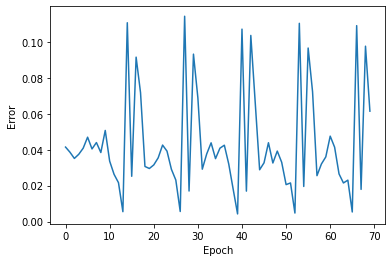

In [ ]:
#for i in range(epochs):
#    for start, end in zip( range(0, len(trX), batchsize), range(batchsize, len(trX), batchsize)):
#        batch = trX[start:end]
#        cur_w = sess.run(update_w, feed_dict={v0: batch, W: prv_w, vl: prv_vl, hl: prv_hbl})
#        cur_vl = sess.run(update_vb, feed_dict={v0: batch, W: prv_w, vl: prv_vl, hb: prv_hl})
#        cur_hl = sess.run(update_hb, feed_dict={v0: batch, W: prv_w, vl: prv_vl, hb: prv_hl})
#        prv_w = cur_w
#        prv_vl = cur_vl
#        prv_hl = cur_hl
#    errors.append(sess.run(err_sum, feed_dict={v0: trX, W: cur_w, vb: cur_vl, hb: cur_hl}))
#    print (errors[-1])
v0_state=v0
for epoch in range(epochs):
    batch_number = 0
    for batch_x in train_ds:
        for i_sample in range(len(batch_x)):
            for k in range(K):
                v0_state = batch_x[i_sample]
                h0_state = hidden_layer(v0_state, W, hl)
                v1_state = reconstructed_output(h0_state, W, vl)
                h1_state = hidden_layer(v1_state, W, hl)

                delta_W = tf.matmul(tf.transpose([v0_state]), h0_state) - \
                          tf.matmul(tf.transpose([v1_state]), h1_state)
                W = W + alpha * delta_W

                vl = vl + alpha * tf.reduce_mean(v0_state - v1_state, 0)
                hl = hl + alpha * tf.reduce_mean(h0_state - h1_state, 0)

                v0_state = v1_state

            if i_sample == len(batch_x)-1:
                err = error(batch_x[i_sample], v1_state)
                errors.append(err)
                weights.append(W)
                print ( 'Epoch: %d' % (epoch + 1),
                       "batch #: %i " % batch_number, "of %i" % (len(trX)/batchsize),
                       "sample #: %i" % i_sample,
                       'reconstruction error: %f' % err)
        batch_number += 1




plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

## **Recommendation**

In [ ]:
mock_user_id = 215
#Selecting the input user
inputUser = trX[mock_user_id-1].reshape(1, -1)
inputUser = tf.convert_to_tensor(trX[mock_user_id-1],"float32")
v0 = inputUser
print(v0)
v0.shape

tf.Tensor([0.8 0.  0.  ... 0.  0.  0. ], shape=(3706,), dtype=float32)


TensorShape([3706])

In [ ]:
v0test = tf.zeros([visibleUnits], tf.float32)
v0test.shape

TensorShape([3706])

In [ ]:
#Feeding in the user and reconstructing the input
hh0 = tf.nn.sigmoid(tf.matmul([v0], W) + hl)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vl)
rec = vv1
tf.maximum(rec,1)
for i in vv1:
    print(i)

tf.Tensor([0.05638689 0.0225602  0.00099306 ... 0.00036775 0.00012683 0.00284555], shape=(3706,), dtype=float32)


In [ ]:
#movies user watched before
movies_df_mock = ratings_df[ratings_df['UserID'] == mock_user_id]
merged_df = movies_df_mock.merge(movies_df, how = 'left', on = ['MovieID'])
merged_df.head(10)

UserID  MovieID  Rating  Timestamp  \
0     215     3793       5  977099259   
1     215        1       4  979174987   
2     215     1197       5  976899663   
3     215     2302       5  976899718   
4     215     2167       5  976899770   
5     215     2094       5  976908614   
6     215     1372       4  976908614   
7     215     1527       2  976908595   
8     215     3072       5  976899294   
9     215     1617       4  976908485   

                                           Title  \
0                                   X-Men (2000)   
1                               Toy Story (1995)   
2                     Princess Bride, The (1987)   
3                         My Cousin Vinny (1992)   
4                                   Blade (1998)   
5                          Rocketeer, The (1991)   
6  Star Trek VI: The Undiscovered Country (1991)   
7                      Fifth Element, The (1997)   
8                              Moonstruck (1987)   
9                       L.A. Confidential (1997)   

                             Genres  
0                     Action|Sci-Fi  
1       Animation|Children's|Comedy  
2   Action|Adventure|Comedy|Romance  
3                            Comedy  
4           Action|Adventure|Horror  
5           Action|Adventure|Sci-Fi  
6           Action|Adventure|Sci-Fi  
7                     Action|Sci-Fi  
8                            Comedy  
9  Crime|Film-Noir|Mystery|Thriller

In [ ]:
#top ZM0 movies
scored_movies_df_mock = movies_df[movies_df['MovieID'].isin(user_rating_df.columns)]
scored_movies_df_mock = scored_movies_df_mock.assign(RecommendationScore = rec[0])
scored_movies_df_mock.sort_values(["RecommendationScore"], ascending=False).head(10)

MovieID                                              Title  \
2502     2571                                 Matrix, The (1999)   
2559     2628   Star Wars: Episode I - The Phantom Menace (1999)   
1192     1210  Star Wars: Episode VI - Return of the Jedi (1983)   
1178     1196  Star Wars: Episode V - The Empire Strikes Back...   
108       110                                  Braveheart (1995)   
257       260          Star Wars: Episode IV - A New Hope (1977)   
2847     2916                                Total Recall (1990)   
1959     2028                         Saving Private Ryan (1998)   
1220     1240                             Terminator, The (1984)   
1353     1374                Star Trek: The Wrath of Khan (1982)   

                                   Genres  RecommendationScore  
2502               Action|Sci-Fi|Thriller             0.575641  
2559      Action|Adventure|Fantasy|Sci-Fi             0.553923  
1192  Action|Adventure|Romance|Sci-Fi|War             0.541436  
1178    Action|Adventure|Drama|Sci-Fi|War             0.470152  
108                      Action|Drama|War             0.425229  
257       Action|Adventure|Fantasy|Sci-Fi             0.413044  
2847     Action|Adventure|Sci-Fi|Thriller             0.409753  
1959                     Action|Drama|War             0.395376  
1220               Action|Sci-Fi|Thriller             0.384843  
1353              Action|Adventure|Sci-Fi             0.373117

In [ ]:
#Merging movies_df with ratings_df by MovieID
merged_df_mock = scored_movies_df_mock.merge(merged_df, on='MovieID', how='outer')
merged_df_mock

MovieID                             Title_x  \
0           1                    Toy Story (1995)   
1           2                      Jumanji (1995)   
2           3             Grumpier Old Men (1995)   
3           4            Waiting to Exhale (1995)   
4           5  Father of the Bride Part II (1995)   
...       ...                                 ...   
3701     3948             Meet the Parents (2000)   
3702     3949          Requiem for a Dream (2000)   
3703     3950                    Tigerland (2000)   
3704     3951             Two Family House (2000)   
3705     3952               Contender, The (2000)   

                          Genres_x  RecommendationScore  UserID  Rating  \
0      Animation|Children's|Comedy             0.056387   215.0     4.0   
1     Adventure|Children's|Fantasy             0.022560     NaN     NaN   
2                   Comedy|Romance             0.000993     NaN     NaN   
3                     Comedy|Drama             0.000317     NaN     NaN   
4                           Comedy             0.004550     NaN     NaN   
...                            ...                  ...     ...     ...   
3701                        Comedy             0.006744     NaN     NaN   
3702                         Drama             0.000616     NaN     NaN   
3703                         Drama             0.000368     NaN     NaN   
3704                         Drama             0.000127     NaN     NaN   
3705                Drama|Thriller             0.002846     NaN     NaN   

        Timestamp           Title_y                     Genres_y  
0     979174987.0  Toy Story (1995)  Animation|Children's|Comedy  
1             NaN               NaN                          NaN  
2             NaN               NaN                          NaN  
3             NaN               NaN                          NaN  
4             NaN               NaN                          NaN  
...           ...               ...                          ...  
3701          NaN               NaN                          NaN  
3702          NaN               NaN                          NaN  
3703          NaN               NaN                          NaN  
3704          NaN               NaN                          NaN  
3705          NaN               NaN                          NaN  

[3706 rows x 9 columns]

In [ ]:
merged_df_mock.sort_values(["RecommendationScore"], ascending=False).head(20)

MovieID                                            Title_x  \
2374     2571                                 Matrix, The (1999)   
2426     2628   Star Wars: Episode I - The Phantom Menace (1999)   
1120     1210  Star Wars: Episode VI - Return of the Jedi (1983)   
1106     1196  Star Wars: Episode V - The Empire Strikes Back...   
106       110                                  Braveheart (1995)   
253       260          Star Wars: Episode IV - A New Hope (1977)   
2708     2916                                Total Recall (1990)   
1848     2028                         Saving Private Ryan (1998)   
1148     1240                             Terminator, The (1984)   
1275     1374                Star Trek: The Wrath of Khan (1982)   
2741     2949                                      Dr. No (1962)   
1449     1580                                Men in Black (1997)   
2557     2762                            Sixth Sense, The (1999)   
1025     1097                  E.T. the Extra-Terrestrial (1982)   
466       480                               Jurassic Park (1993)   
319       329                      Star Trek: Generations (1994)   
3177     3408                             Erin Brockovich (2000)   
737       780                      Independence Day (ID4) (1996)   
1178     1270                          Back to the Future (1985)   
575       589                  Terminator 2: Judgment Day (1991)   

                                 Genres_x  RecommendationScore  UserID  \
2374               Action|Sci-Fi|Thriller             0.575641     NaN   
2426      Action|Adventure|Fantasy|Sci-Fi             0.553923   215.0   
1120  Action|Adventure|Romance|Sci-Fi|War             0.541436   215.0   
1106    Action|Adventure|Drama|Sci-Fi|War             0.470152     NaN   
106                      Action|Drama|War             0.425229     NaN   
253       Action|Adventure|Fantasy|Sci-Fi             0.413044   215.0   
2708     Action|Adventure|Sci-Fi|Thriller             0.409753   215.0   
1848                     Action|Drama|War             0.395376     NaN   
1148               Action|Sci-Fi|Thriller             0.384843     NaN   
1275              Action|Adventure|Sci-Fi             0.373117     NaN   
2741                               Action             0.360902     NaN   
1449       Action|Adventure|Comedy|Sci-Fi             0.334306     NaN   
2557                             Thriller             0.325808     NaN   
1025      Children's|Drama|Fantasy|Sci-Fi             0.302777   215.0   
466               Action|Adventure|Sci-Fi             0.301856   215.0   
319               Action|Adventure|Sci-Fi             0.286172     NaN   
3177                                Drama             0.266703     NaN   
737                     Action|Sci-Fi|War             0.263770     NaN   
1178                        Comedy|Sci-Fi             0.254763     NaN   
575                Action|Sci-Fi|Thriller             0.231424     NaN   

      Rating    Timestamp                                            Title_y  \
2374     NaN          NaN                                                NaN   
2426     5.0  976908635.0   Star Wars: Episode I - The Phantom Menace (1999)   
1120     5.0  976899689.0  Star Wars: Episode VI - Return of the Jedi (1983)   
1106     NaN          NaN                                                NaN   
106      NaN          NaN                                                NaN   
253      5.0  976899190.0          Star Wars: Episode IV - A New Hope (1977)   
2708     4.0  976908547.0                                Total Recall (1990)   
1848     NaN          NaN                                                NaN   
1148     NaN          NaN                                                NaN   
1275     NaN          NaN                                                NaN   
2741     NaN          NaN                                                NaN   
1449     NaN          NaN                                     